In [3]:
from pydot import Dot

In [12]:
import xgboost as xgb
import numpy as np
data = np.random.rand(5,10) # 5 entities, each contains 10 features
label = np.random.randint(2, size=5) # binary target
dtrain = xgb.DMatrix( data, label=label)

dtest = dtrain

param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist  = [(dtest,'eval'), (dtrain,'train')]

num_round = 10
bst = xgb.train( param, dtrain, num_round, evallist )

bst.dump_model('dump.raw.txt')

[0]	eval-auc:0.5	train-auc:0.5
[1]	eval-auc:0.5	train-auc:0.5
[2]	eval-auc:0.5	train-auc:0.5
[3]	eval-auc:0.5	train-auc:0.5
[4]	eval-auc:0.5	train-auc:0.5
[5]	eval-auc:0.5	train-auc:0.5
[6]	eval-auc:0.5	train-auc:0.5
[7]	eval-auc:0.5	train-auc:0.5
[8]	eval-auc:0.5	train-auc:0.5
[9]	eval-auc:0.5	train-auc:0.5


In [5]:
import numpy as np
import subprocess

from IPython.display import Image
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss, accuracy_score

#classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


#reproducibility
seed = 104


Prepare data - generate 20 dimentional dataset with 1000 samples 

In [6]:
X,y = make_classification(n_samples=1000,n_features=20, n_informative=8, n_redundant=3,n_repeated=2, random_state=seed)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=seed)

In [8]:
X,y

(array([[-0.96954813, -1.96531699, -0.15393876, ..., -0.34722606,
         -0.39896208,  0.95863448],
        [-1.0021095 ,  3.05810516,  2.3919123 , ..., -1.84372039,
          2.458584  ,  0.74878887],
        [-2.43756063,  2.57730569, -1.61741055, ...,  0.06732489,
          1.40764799,  3.22699764],
        ..., 
        [-0.26362339,  0.04879755, -1.7208111 , ..., -0.14081885,
          1.30791173,  1.28721991],
        [-0.64155627,  1.042981  , -0.9476855 , ...,  0.12257056,
          0.17872718,  3.76695157],
        [ 0.6304144 , -2.49064484,  3.01541698, ...,  2.14665732,
          3.40691204, -1.83730377]]),
 array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [9]:
print('Train Label Distribution:')
print(Counter(y_train))
print('\nTest Label Distribution:')
print(Counter(y_test))

Train Label Distribution:
Counter({1: 404, 0: 396})

Test Label Distribution:
Counter({0: 106, 1: 94})


The data is equally distributed

In [10]:
decison_tree = DecisionTreeClassifier(random_state=seed)

#train Classifier
decison_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=104,
            splitter='best')

In [11]:
#predict Output
decision_tree_y_pred = decison_tree.predict(X_test)
decision_tree_y_pred_prob = decison_tree.predict_proba(X_test)

In [12]:
#evaluation
decision_tree_accuracy = accuracy_score(y_test,decision_tree_y_pred)
decision_tree_logloss = log_loss(y_test,decision_tree_y_pred_prob)

In [13]:
print("****Decision Tree******")
print("Accuracy : {0:.2f}".format(decision_tree_accuracy))
print("Accuracy : {0:.2f}".format(decision_tree_logloss))
print("Number of nodes created : {}".format(decison_tree.tree_.node_count))

****Decision Tree******
Accuracy : 0.85
Accuracy : 5.01
Number of nodes created : 143


Analyze how our classifier is performing

In [14]:
print('True Labels')
print(y_test[:15,])
print('\nPredicted Labels:')
print(decision_tree_y_pred[:15,])
print('\nPredicted Probabilities')
print(decision_tree_y_pred_prob[:15,])

True Labels
[1 1 0 0 0 1 0 0 0 1 1 1 1 1 0]

Predicted Labels:
[1 1 0 0 0 1 0 0 0 1 1 1 1 1 0]

Predicted Probabilities
[[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]


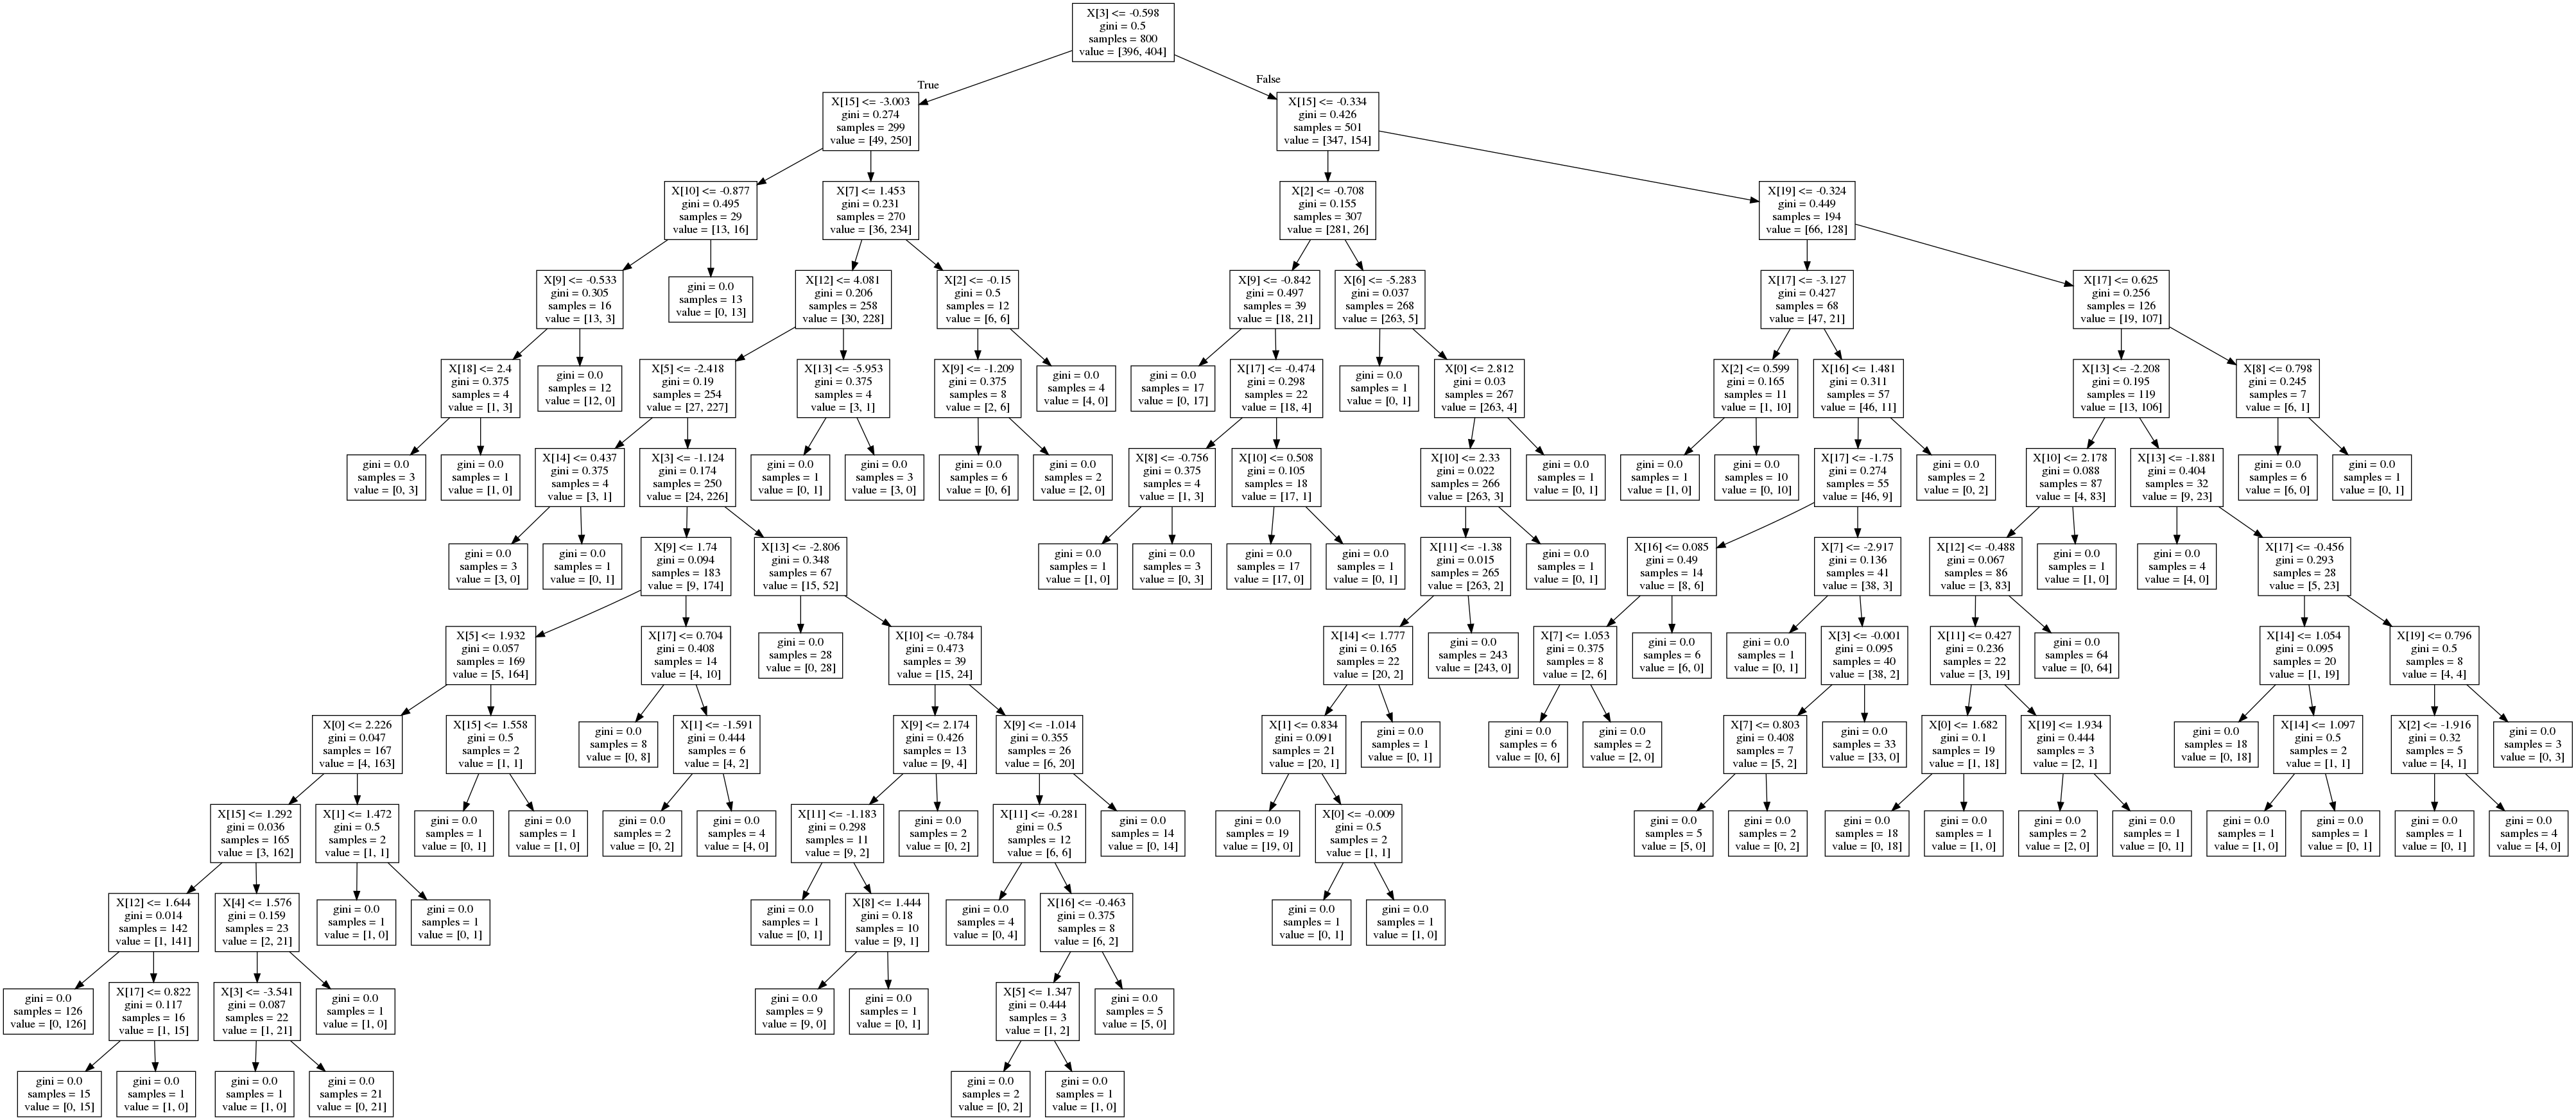

In [15]:
dt_viz_file = 'images/dt.dot'
dt_png_file = 'images/dt.png'

#create Visualization
export_graphviz(decison_tree,out_file=dt_viz_file)

#convert to png
command = ["dot","-Tpng", dt_viz_file, "-o", dt_png_file]
subprocess.check_call(command)

#display Image
Image(filename=dt_png_file)

Adaboost Classifier  - creatinh 1000 of the above classifiers 

In [40]:
adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    algorithm = 'SAMME',
    n_estimators=1000,
    random_state=seed)

#train classifier
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=104)

In [41]:
#calculate Predictions
adaboost_y_pred = adaboost.predict(X_test)
adaboost_y_pred_prob = adaboost.predict_proba(X_test)

In [42]:
#evaluate
adaboost_accuracy = accuracy_score(y_test,adaboost_y_pred)
adaboost_logloss = log_loss(y_test,adaboost_y_pred_prob)

In [43]:
print ("***Adaboost****")
print("Accuracy : {0:.2f}".format(adaboost_accuracy))
print("Accuracy : {0:.2f}".format(adaboost_logloss))

***Adaboost****
Accuracy : 0.84
Accuracy : 0.68


In [44]:
print('True Labels')
print(y_test[:15,])
print('\nPredicted Labels:')
print(adaboost_y_pred[:15,])
print('\nPredicted Probabilities')
print(adaboost_y_pred_prob[:15,])

True Labels
[1 1 0 0 0 1 0 0 0 1 1 1 1 1 0]

Predicted Labels:
[1 0 0 0 0 1 0 0 0 0 1 1 1 0 0]

Predicted Probabilities
[[ 0.48396329  0.51603671]
 [ 0.49868559  0.50131441]
 [ 0.49892766  0.50107234]
 [ 0.50151698  0.49848302]
 [ 0.50566436  0.49433564]
 [ 0.49596524  0.50403476]
 [ 0.50715619  0.49284381]
 [ 0.50458761  0.49541239]
 [ 0.49543632  0.50456368]
 [ 0.49849406  0.50150594]
 [ 0.49484421  0.50515579]
 [ 0.48920944  0.51079056]
 [ 0.49259551  0.50740449]
 [ 0.49794129  0.50205871]
 [ 0.50221988  0.49778012]]


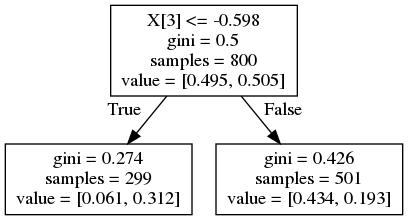

In [45]:
#visualize 
ada_t1 = adaboost.estimators_[0]
ada_t1_viz_file = 'images/ada-t1.dot'
ada_t1_png_file = 'images/ada-t1.png'

export_graphviz(ada_t1,out_file =ada_t1_viz_file )

command = ["dot","-Tpng",ada_t1_viz_file,"-o",ada_t1_png_file]
subprocess.check_call(command)

Image(filename=ada_t1_png_file)

In [46]:
print("Error:{0:.2f}".format(adaboost.estimator_errors_[0]))
print("Tree importance: {0:2f}".format(adaboost.estimator_weights_[0]))

Error:0.25
Tree importance: 1.078711


Gradient Boosted Tree

In [61]:
gbc = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=1000,
    warm_start=True,
    random_state=seed)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=104, subsample=1.0, verbose=0,
              warm_start=True)

In [62]:
#make Prediction
gbc_y_pred = gbc.predict(X_test)
gbc_y_pred_prob = gbc.predict_proba(X_test)

In [63]:
#calcumate log loss
gbc_accuracy = accuracy_score(y_test,gbc_y_pred)
gbc_logloss = log_loss(y_test,gbc_y_pred_prob)

In [64]:
print ("***Gradient boosting****")
print("Accuracy : {0:.2f}".format(gbc_accuracy))
print("Log_loss : {0:.2f}".format(gbc_logloss))

***Gradient boosting****
Accuracy : 0.90
Log_loss : 0.36


In [65]:
print('True Labels')
print(y_test[:15,])
print('\nPredicted Labels:')
print(gbc_y_pred[:15,])
print('\nPredicted Probabilities')
print(gbc_y_pred_prob[:15,])

True Labels
[1 1 0 0 0 1 0 0 0 1 1 1 1 1 0]

Predicted Labels:
[1 1 0 0 0 1 0 0 0 0 1 1 1 1 0]

Predicted Probabilities
[[  1.47675097e-04   9.99852325e-01]
 [  2.20662127e-01   7.79337873e-01]
 [  9.81824931e-01   1.81750694e-02]
 [  9.93012966e-01   6.98703381e-03]
 [  9.99990769e-01   9.23085544e-06]
 [  2.19889247e-04   9.99780111e-01]
 [  9.99978260e-01   2.17397074e-05]
 [  9.98092802e-01   1.90719791e-03]
 [  7.82993817e-01   2.17006183e-01]
 [  7.80015408e-01   2.19984592e-01]
 [  6.16641794e-04   9.99383358e-01]
 [  7.51466902e-04   9.99248533e-01]
 [  1.29348099e-03   9.98706519e-01]
 [  4.78940378e-05   9.99952106e-01]
 [  9.99760178e-01   2.39821701e-04]]


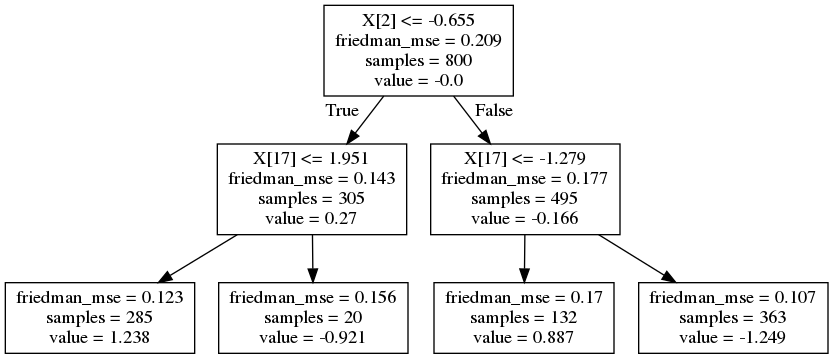

In [67]:
#visualize 
gbc_t1 = gbc.estimators_[2][0]
gbc_t1_viz_file = 'images/gbc-t1.dot'
gbc_t1_png_file = 'images/gbc-t1.png'

export_graphviz(gbc_t1,out_file =gbc_t1_viz_file )

command = ["dot","-Tpng",gbc_t1_viz_file,"-o",gbc_t1_png_file]
subprocess.check_call(command)

Image(filename=gbc_t1_png_file)

In [68]:
import numpy as np
import xgboost as xgb

#xgboost only handles numerical input

Agaricus dataset is mushroom dataset

In [69]:
dtrain = xgb.DMatrix('data/agaricus.txt.train')
dtest = xgb.DMatrix('data/agaricus.txt.test')

In [75]:
print("Train datsset contains {0} and {1} columns".format(dtrain.num_row(),dtrain.num_col()))
print("test datsset contains {0} and {1} columns".format(dtest.num_row(),dtest.num_col()))

Train datsset contains 6513 and 127 columns
test datsset contains 1611 and 127 columns


In [76]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))

print("Train possible labels: ")
print(np.unique(dtest.get_label()))

Train possible labels: 
[ 0.  1.]
Train possible labels: 
[ 0.  1.]


In [91]:
params = {
    'objective':'binary:logistic',
    'max_depth':2,
    'silent':1,
    'eta':1
}

num_rounds=10

In [92]:
#training 
bst = xgb.train(params,dtrain,num_rounds)


In [93]:
watchlist = [(dtest,'test'),(dtrain,'train')]
bst = xgb.train(params,dtrain,num_rounds,watchlist)

[0]	test-error:0.042831	train-error:0.046522
[1]	test-error:0.021726	train-error:0.022263
[2]	test-error:0.006207	train-error:0.007063
[3]	test-error:0.018001	train-error:0.0152
[4]	test-error:0.006207	train-error:0.007063
[5]	test-error:0	train-error:0.001228
[6]	test-error:0	train-error:0.001228
[7]	test-error:0	train-error:0.001228
[8]	test-error:0	train-error:0.001228
[9]	test-error:0	train-error:0


In [94]:
preds_prob = bst.predict(dtest)
preds_prob

array([ 0.00501517,  0.98844671,  0.00501517, ...,  0.99811018,
        0.00285519,  0.99811018], dtype=float32)

In [96]:
labels = dtest.get_label()
preds = preds_prob >0.5
correct = 0

for i in range(len(preds)):
    if(labels[i] == preds[i]):
        correct+=1
        
print('Predicted correctly: {0}/{1}'.format(correct,len(preds)))
print('Error : {0:.4f}'.format(1-correct/len(preds)))

Predicted correctly: 1611/1611
Error : 0.0000


Scikit Learn Interface

In [97]:
import numpy as np

from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score

from xgboost.sklearn import XGBClassifier

In [98]:
X_train,y_train, X_test, y_test = load_svmlight_files(('data/agaricus.txt.train','data/agaricus.txt.test'))

In [99]:
print("Train datsset contains {0} and {1} columns".format(X_train.shape[0],X_train.shape[1]))
print("test datsset contains {0} and {1} columns".format(X_test.shape[0],X_test.shape[1]))

Train datsset contains 6513 and 126 columns
test datsset contains 1611 and 126 columns


In [100]:
print("Train possible labels: ")
print(np.unique(y_train))

print("Train possible labels: ")
print(np.unique(y_test))

Train possible labels: 
[ 0.  1.]
Train possible labels: 
[ 0.  1.]


In [110]:
params = {
    'objective':'binary:logistic',
    'max_depth':2,
    'learning_rate':1.0,
    'silent':1,
    'n_estimators':5
}

Training

In [111]:
bst = XGBClassifier(**params).fit(X_train,y_train)

Make predictions

In [112]:
preds = bst.predict(X_test)
preds

array([ 0.,  1.,  0., ...,  1.,  0.,  1.])

In [113]:
correct = 0

for i in range(len(preds)):
    if(y_test[i] == preds[i]):
        correct+=1
        
acc= accuracy_score(y_test,preds)
        
print('Predicted correctly: {0}/{1}'.format(correct,len(preds)))
print('Error : {0:.4f}'.format(1-acc))

Predicted correctly: 1601/1611
Error : 0.0062


Spotting Most important Features

In [114]:
%matplotlib inline

import xgboost as xgb
import seaborn as sns
import pandas as pd

sns.set(font_scale=1.5)

Load Data

In [115]:
dtrain = xgb.DMatrix('data/agaricus.txt.train')
dtest = xgb.DMatrix('data/agaricus.txt.test')

Train the Model

In [124]:
params = {
    'objective':'binary:logistic',
    'max_depth':1,
    'silent':1,
    'eta':0.5
}

num_rounds=5

In [125]:
watchlist = [(dtest,'test'),(dtrain,'train')]
bst = xgb.train(params,dtrain,num_rounds,watchlist)

[0]	test-error:0.11049	train-error:0.113926
[1]	test-error:0.11049	train-error:0.113926
[2]	test-error:0.03352	train-error:0.030401
[3]	test-error:0.027312	train-error:0.021495
[4]	test-error:0.031037	train-error:0.025487


Representation of the tree

In [126]:
trees_dump = bst.get_dump(fmap='data/featmap.txt',with_stats=True)

for tree in trees_dump:
    print(tree)

0:[odor=pungent] yes=2,no=1,gain=4000.53101,cover=1628.25
	1:leaf=0.647757947,cover=924.5
	2:leaf=-0.933309674,cover=703.75

0:[odor=musty] yes=2,no=1,gain=1377.22424,cover=1404.203
	1:leaf=-0.339609325,cover=1008.21417
	2:leaf=0.759690285,cover=395.988831

0:[gill-size=narrow] yes=2,no=1,gain=1210.76575,cover=1232.64319
	1:leaf=0.673357666,cover=430.293335
	2:leaf=-0.36520344,cover=802.349915

0:[stalk-surface-above-ring=smooth] yes=2,no=1,gain=791.95874,cover=1111.84363
	1:leaf=-0.277528912,cover=765.906372
	2:leaf=0.632880688,cover=345.937195

0:[odor=pungent] yes=2,no=1,gain=493.703644,cover=981.6828
	1:leaf=0.275961101,cover=638.372559
	2:leaf=-0.466680348,cover=343.310272



plot

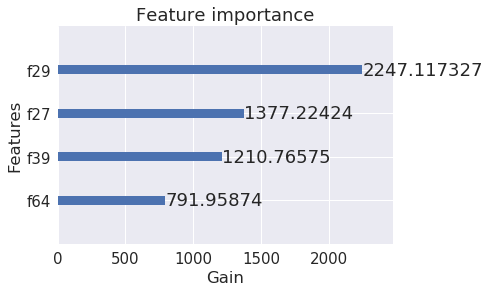

In [130]:
xgb.plot_importance(bst,importance_type='gain',xlabel='Gain')

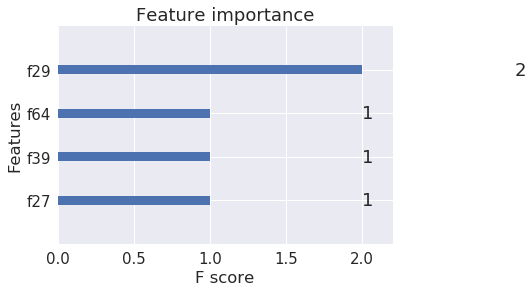

In [131]:
xgb.plot_importance(bst)

In [132]:
importances  = bst.get_fscore()
importances

{'f27': 1, 'f29': 2, 'f39': 1, 'f64': 1}

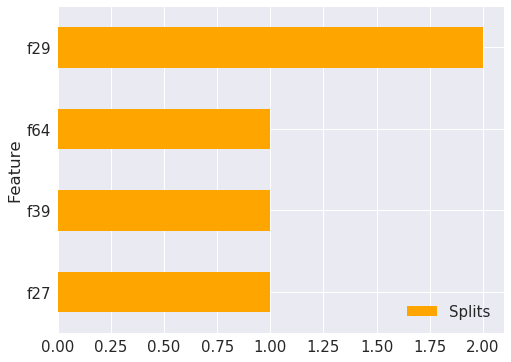

In [133]:
#create df
importance_df = pd.DataFrame({
    'Splits': list(importances.values()),
    'Feature': list(importances.keys())
})

importance_df.sort_values(by='Splits',inplace=True)
importance_df.plot(kind='barh', x='Feature', figsize=(8,6), color='Orange')

In [134]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import validation_curve
from sklearn.datasets import load_svmlight_files
from sklearn.cross_validation import StratifiedKFold
from sklearn.datasets import make_classification
from xgboost.sklearn import XGBClassifier
from scipy.sparse import vstack

#reproducibility
seed = 123
np.random.seed(seed)

In [135]:
X,y = make_classification(n_samples=1000,n_features=20, n_informative=8, n_redundant=3,n_repeated=2, random_state=seed)

we divide the data into 10 stratified folds

In [136]:
cv = StratifiedKFold(y,n_folds=10,shuffle=True, random_state=seed)

In [137]:
cv

sklearn.cross_validation.StratifiedKFold(labels=[1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1

In [138]:
default_params = {
    'objective': 'binary:logistic',
    'max_depth': 1,
    'learning_rate': 0.3,
    'silent': 1.0
}

n_estimators_range = np.linspace(1, 200, 10).astype('int')

train_scores, test_scores = validation_curve(
    XGBClassifier(**default_params),
    X, y,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv,
    scoring='accuracy'
)

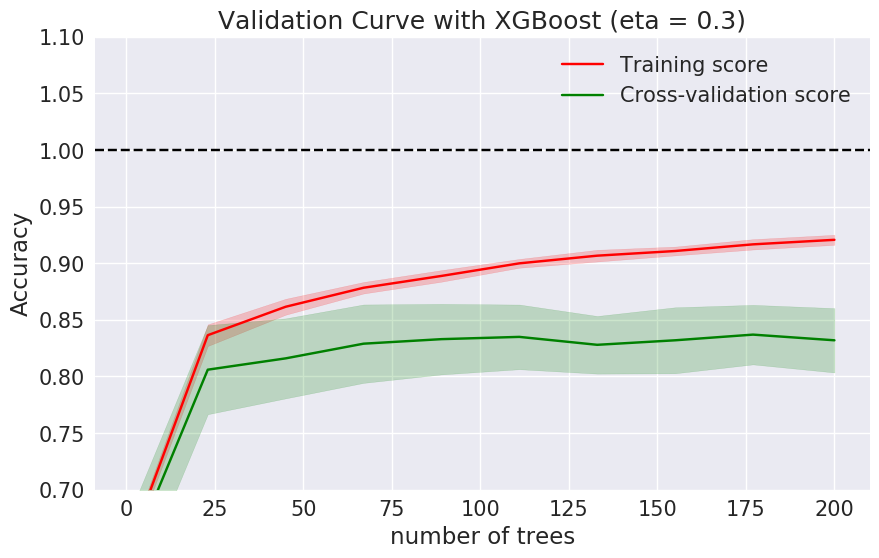

Best cross-validation result (0.84) obtained for 177 trees


In [140]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.1)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean, 
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

In [167]:
default_params = {
    'objective': 'binary:logistic',
    'max_depth': 6, # changed
    'learning_rate': 0.1,
    'silent': 0,
    'colsample_bytree': 0.7, # added
    'subsample': 0.7 # added
}

n_estimators_range = np.linspace(1, 200, 10).astype('int')

train_scores, test_scores = validation_curve(
    XGBClassifier(**default_params),
    X, y,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv,
    scoring='accuracy'
)

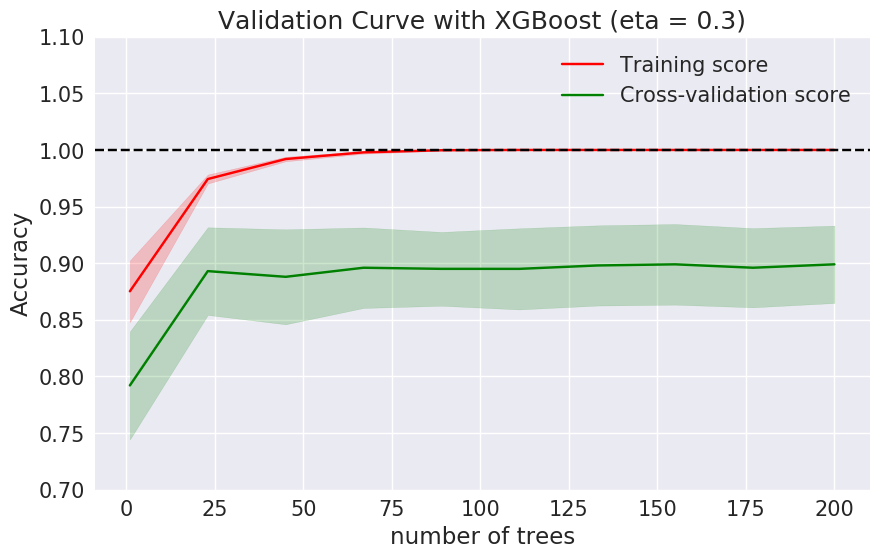

Best cross-validation result (0.90) obtained for 200 trees


In [168]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (eta = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.1)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean, 
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

Grid search and optimized grid search  - Hyper parameter tuning

In [170]:
from xgboost.sklearn import XGBClassifier

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.cross_validation import StratifiedKFold

from scipy.stats import randint,uniform

#reproducability
seed = 342
np.random.seed(seed)

In [171]:
X,y = make_classification(n_samples=1000,n_features=20, n_informative=8, n_redundant=3,n_repeated=2, random_state=seed)

In [172]:
cv = StratifiedKFold(y,n_folds=10,shuffle=True, random_state=seed)

Grid Search

In [216]:
params_grid = {
    'max_depth':np.arange(1,8,1).astype(int),
    'n_estimators':np.arange(5,200,50).astype(int),
    'learning_rate': np.linspace(1e-16,1,3)
}

In [217]:
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}

In [218]:
bst_grid = GridSearchCV(
    estimator = XGBClassifier(**params_fixed,seed=seed),
    param_grid=params_grid,
    cv=cv,
    scoring='accuracy'
)

In [219]:
bst_grid.fit(X,y)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 0 ..., 0 1], n_folds=10, shuffle=True, random_state=342),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=342, silent=1,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7]), 'n_estimators': array([  5,  55, 105, 155]), 'learning_rate': array([  1.00000e-16,   5.00000e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [220]:
bst_grid.grid_scores_

[mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 1, 'n_estimators': 5},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 1, 'n_estimators': 55},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 1, 'n_estimators': 105},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 1, 'n_estimators': 155},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 2, 'n_estimators': 5},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 2, 'n_estimators': 55},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 2, 'n_estimators': 105},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999999999999998e-17, 'max_depth': 2, 'n_estimators': 155},
 mean: 0.50400, std: 0.00200, params: {'learning_rate': 9.9999

In [221]:
print("Best accuracy obtained: {0}".format(bst_grid.best_score_))
print("Parameters:")

for key, value in bst_grid.best_params_.items():
    print("\t{}:{}".format(key,value))

Best accuracy obtained: 0.883
Parameters:
	learning_rate:0.5
	max_depth:4
	n_estimators:155


Randomized grid search

In [227]:
params_dist_grid = {
    'max_depth':[1,2,3,4],
    'gamma':[0,0.5,1],
    'n_estimators': randint(1,1001), # uniform discrete random distribution
    'learning_rate':uniform(), # gaussian distribution
    'subsample':uniform(),
    'colsample_bytree': uniform()
    
}

Initialize rendomizedsearchcv to pick 10 combination of parameters

In [228]:
rs_grid = RandomizedSearchCV(
    estimator = XGBClassifier(**params_fixed,seed=seed),
    param_distributions=params_dist_grid,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    random_state=seed
)

In [229]:
rs_grid.fit(X,y)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 0 ..., 0 1], n_folds=10, shuffle=True, random_state=342),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=342, silent=1,
       subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [1, 2, 3, 4], 'gamma': [0, 0.5, 1], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c15f2fe80>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c15f2f908>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c16742860>, 'colsample_bytree': <scipy.stats._d

In [230]:
rs_grid.grid_scores_

[mean: 0.70600, std: 0.03007, params: {'colsample_bytree': 0.065034396841929132, 'gamma': 0, 'learning_rate': 0.82231421953113004, 'max_depth': 3, 'n_estimators': 492, 'subsample': 0.11676744056370758},
 mean: 0.83200, std: 0.03288, params: {'colsample_bytree': 0.11848249237448605, 'gamma': 1, 'learning_rate': 0.13214054942810016, 'max_depth': 1, 'n_estimators': 689, 'subsample': 0.4325346125891868},
 mean: 0.79200, std: 0.02265, params: {'colsample_bytree': 0.37621772642449514, 'gamma': 0, 'learning_rate': 0.61087022642994204, 'max_depth': 4, 'n_estimators': 392, 'subsample': 0.15239319471904489},
 mean: 0.82400, std: 0.02657, params: {'colsample_bytree': 0.20992824607318106, 'gamma': 1, 'learning_rate': 0.40898494335099522, 'max_depth': 1, 'n_estimators': 574, 'subsample': 0.70993001900730734},
 mean: 0.82500, std: 0.03214, params: {'colsample_bytree': 0.22187963515640408, 'gamma': 1, 'learning_rate': 0.82924717948414195, 'max_depth': 2, 'n_estimators': 116, 'subsample': 0.9361060863

In [231]:
rs_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.80580143163765727, gamma=0,
       learning_rate=0.46363095388213049, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=281, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=342, silent=1,
       subsample=0.76526283302535481)

In [232]:
rs_grid.best_params_

{'colsample_bytree': 0.80580143163765727,
 'gamma': 0,
 'learning_rate': 0.46363095388213049,
 'max_depth': 4,
 'n_estimators': 281,
 'subsample': 0.76526283302535481}

In [233]:
rs_grid.best_score_

0.873

Evaluate Results

In [255]:
import numpy as np
import xgboost as xgb
import pprint as pprint

# reproducibility
seed=123
np.random.seed(seed)

In [235]:
#load agaricus data
dtrain = xgb.DMatrix('data/agaricus.txt.train')
dtest = xgb.DMatrix('data/agaricus.txt.test')

specify the training parameters

In [239]:
params = {
    'objctive':'binary:logistic',
    'max_depth': 1,
    'silent':1,
    'eta':0.5
}

In [240]:
watchlist = [(dtest,'test'),(dtrain,'train')]


In [241]:
bst = xgb.train(params,dtrain,num_rounds,watchlist)

[0]	test-rmse:0.365199	train-rmse:0.366697
[1]	test-rmse:0.321067	train-rmse:0.317967
[2]	test-rmse:0.277327	train-rmse:0.27404
[3]	test-rmse:0.25401	train-rmse:0.248569
[4]	test-rmse:0.236272	train-rmse:0.22669


In [244]:
#rmse, mae.logloss,error,merror,auc,ndcg,map
params['eval_metric'] = 'logloss'
bst = xgb.train(params,dtrain,num_rounds,watchlist)

[0]	test-logloss:0.447216	train-logloss:0.449482
[1]	test-logloss:0.36359	train-logloss:0.358354
[2]	test-logloss:0.294189	train-logloss:0.289006
[3]	test-logloss:0.252393	train-logloss:0.244009
[4]	test-logloss:0.233432	train-logloss:0.221526


In [245]:
params['eval_metric'] = ['logloss','rmse','mae','auc','ndcg']
bst = xgb.train(params,dtrain,num_rounds,watchlist)

[0]	test-logloss:0.447216	test-rmse:0.365199	test-mae:0.344582	test-auc:0.892138	test-ndcg:0.88738	train-logloss:0.449482	train-rmse:0.366697	train-mae:0.345972	train-auc:0.888997	train-ndcg:0.91068
[1]	test-logloss:0.36359	test-rmse:0.321067	test-mae:0.282551	test-auc:0.938901	test-ndcg:0.984496	train-logloss:0.358354	train-rmse:0.317967	train-mae:0.279527	train-auc:0.942881	train-ndcg:0.987617
[2]	test-logloss:0.294189	test-rmse:0.277327	test-mae:0.230874	test-auc:0.976157	test-ndcg:0.995667	train-logloss:0.289006	train-rmse:0.27404	train-mae:0.229328	train-auc:0.981415	train-ndcg:0.997093
[3]	test-logloss:0.252393	test-rmse:0.25401	test-mae:0.197945	test-auc:0.9785	test-ndcg:0.996771	train-logloss:0.244009	train-rmse:0.248569	train-mae:0.195056	train-auc:0.983744	train-ndcg:0.997868
[4]	test-logloss:0.233432	test-rmse:0.236272	test-mae:0.188228	test-auc:0.98109	test-ndcg:0.997378	train-logloss:0.221526	train-rmse:0.22669	train-mae:0.182826	train-auc:0.986494	train-ndcg:0.998367


In [246]:
#custome error methods
def misclassified(pred_probs,dtrain):
    labels=dtrain.get_label()
    preds=pred_probs>0.5
    return 'misclassified', np.sum(labels != preds)

In [249]:
bst = xgb.train(params,dtrain,num_rounds,watchlist,feval=misclassified,maximize=False)

[0]	test-logloss:0.447216	test-rmse:0.365199	test-mae:0.344582	test-auc:0.892138	test-ndcg:0.88738	train-logloss:0.449482	train-rmse:0.366697	train-mae:0.345972	train-auc:0.888997	train-ndcg:0.91068	test-misclassified:178	train-misclassified:742
[1]	test-logloss:0.36359	test-rmse:0.321067	test-mae:0.282551	test-auc:0.938901	test-ndcg:0.984496	train-logloss:0.358354	train-rmse:0.317967	train-mae:0.279527	train-auc:0.942881	train-ndcg:0.987617	test-misclassified:178	train-misclassified:742
[2]	test-logloss:0.294189	test-rmse:0.277327	test-mae:0.230874	test-auc:0.976157	test-ndcg:0.995667	train-logloss:0.289006	train-rmse:0.27404	train-mae:0.229328	train-auc:0.981415	train-ndcg:0.997093	test-misclassified:178	train-misclassified:742
[3]	test-logloss:0.252393	test-rmse:0.25401	test-mae:0.197945	test-auc:0.9785	test-ndcg:0.996771	train-logloss:0.244009	train-rmse:0.248569	train-mae:0.195056	train-auc:0.983744	train-ndcg:0.997868	test-misclassified:50	train-misclassified:166
[4]	test-logloss

In [253]:
eval_result={}
bst = xgb.train(params,dtrain,num_rounds,watchlist,feval=misclassified,maximize=False, evals_result=eval_result)

[0]	test-logloss:0.447216	test-rmse:0.365199	test-mae:0.344582	test-auc:0.892138	test-ndcg:0.88738	train-logloss:0.449482	train-rmse:0.366697	train-mae:0.345972	train-auc:0.888997	train-ndcg:0.91068	test-misclassified:178	train-misclassified:742
[1]	test-logloss:0.36359	test-rmse:0.321067	test-mae:0.282551	test-auc:0.938901	test-ndcg:0.984496	train-logloss:0.358354	train-rmse:0.317967	train-mae:0.279527	train-auc:0.942881	train-ndcg:0.987617	test-misclassified:178	train-misclassified:742
[2]	test-logloss:0.294189	test-rmse:0.277327	test-mae:0.230874	test-auc:0.976157	test-ndcg:0.995667	train-logloss:0.289006	train-rmse:0.27404	train-mae:0.229328	train-auc:0.981415	train-ndcg:0.997093	test-misclassified:178	train-misclassified:742
[3]	test-logloss:0.252393	test-rmse:0.25401	test-mae:0.197945	test-auc:0.9785	test-ndcg:0.996771	train-logloss:0.244009	train-rmse:0.248569	train-mae:0.195056	train-auc:0.983744	train-ndcg:0.997868	test-misclassified:50	train-misclassified:166
[4]	test-logloss

In [256]:
eval_result

{'test': {'auc': [0.892138, 0.938901, 0.976157, 0.9785, 0.98109],
  'logloss': [0.447216, 0.36359, 0.294189, 0.252393, 0.233432],
  'mae': [0.344582, 0.282551, 0.230874, 0.197945, 0.188228],
  'misclassified': [178.0, 178.0, 178.0, 50.0, 40.0],
  'ndcg': [0.88738, 0.984496, 0.995667, 0.996771, 0.997378],
  'rmse': [0.365199, 0.321067, 0.277327, 0.25401, 0.236272]},
 'train': {'auc': [0.888997, 0.942881, 0.981415, 0.983744, 0.986494],
  'logloss': [0.449482, 0.358354, 0.289006, 0.244009, 0.221526],
  'mae': [0.345972, 0.279527, 0.229328, 0.195056, 0.182826],
  'misclassified': [742.0, 742.0, 742.0, 166.0, 128.0],
  'ndcg': [0.91068, 0.987617, 0.997093, 0.997868, 0.998367],
  'rmse': [0.366697, 0.317967, 0.27404, 0.248569, 0.22669]}}

Early stopping

In [257]:
params['eval_metric']='error'
num_rounds = 1500

bst = xgb.train(params,dtrain,num_rounds,watchlist,early_stopping_rounds=10)

[0]	test-error:0.11049	train-error:0.113926
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 10 rounds.
[1]	test-error:0.11049	train-error:0.113926
[2]	test-error:0.11049	train-error:0.113926
[3]	test-error:0.031037	train-error:0.025487
[4]	test-error:0.024829	train-error:0.019653
[5]	test-error:0.017381	train-error:0.014126
[6]	test-error:0.017381	train-error:0.014126
[7]	test-error:0.005587	train-error:0.005988
[8]	test-error:0.005587	train-error:0.005988
[9]	test-error:0.005587	train-error:0.005988
[10]	test-error:0.005587	train-error:0.005988
[11]	test-error:0.005587	train-error:0.005988
[12]	test-error:0.005587	train-error:0.005988
[13]	test-error:0.005587	train-error:0.005988
[14]	test-error:0.005587	train-error:0.005988
[15]	test-error:0.001241	train-error:0.003378
[16]	test-error:0.001241	train-error:0.003378
[17]	test-error:0.001241	train-error:0.003378
[18]	test-error:0.001241	train-error:0

In [258]:
print("best Training score:{}".format(bst.best_score))

best Training score:0.002764


In [263]:
print(f'best training score {bst.best_score}')
print (f'best iterations : {bst.best_iteration}')
print(f'best number of trees limit:{bst.best_ntree_limit}')

best training score 0.002764
best iterations : 25
best number of trees limit:26


Builtin crossvalidation  method

In [265]:
num_rounds = 10
hist = xgb.cv(params,dtrain,num_rounds,nfold=10, metrics={'error'},seed=seed)
hist

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.113924,0.013314,0.113926,0.001479
1,0.113924,0.013314,0.113926,0.001479
2,0.113924,0.013314,0.113926,0.001479
3,0.025487,0.005459,0.025488,0.000606
4,0.029477,0.019884,0.028149,0.017073
5,0.014125,0.004844,0.014126,0.000538
6,0.014125,0.004844,0.014126,0.000538
7,0.005987,0.003661,0.005988,0.000407
8,0.005987,0.003661,0.005988,0.000407
9,0.005987,0.003661,0.005988,0.000407


Handling missing data

In [286]:
import numpy as np
import xgboost as xgb

from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score

#reproducibility
seed=123

In [287]:
np.random.seed(seed)
data_v = np.random.rand(10,5)
data_v

array([[ 0.69646919,  0.28613933,  0.22685145,  0.55131477,  0.71946897],
       [ 0.42310646,  0.9807642 ,  0.68482974,  0.4809319 ,  0.39211752],
       [ 0.34317802,  0.72904971,  0.43857224,  0.0596779 ,  0.39804426],
       [ 0.73799541,  0.18249173,  0.17545176,  0.53155137,  0.53182759],
       [ 0.63440096,  0.84943179,  0.72445532,  0.61102351,  0.72244338],
       [ 0.32295891,  0.36178866,  0.22826323,  0.29371405,  0.63097612],
       [ 0.09210494,  0.43370117,  0.43086276,  0.4936851 ,  0.42583029],
       [ 0.31226122,  0.42635131,  0.89338916,  0.94416002,  0.50183668],
       [ 0.62395295,  0.1156184 ,  0.31728548,  0.41482621,  0.86630916],
       [ 0.25045537,  0.48303426,  0.98555979,  0.51948512,  0.61289453]])

In [288]:
data_m = np.copy(data_v)

data_m[2,3] = np.nan
data_m[0,1] = np.nan
data_m[0,2] = np.nan
data_m[1,0] = np.nan
data_m[4,4] = np.nan
data_m[7,2] = np.nan
data_m[9,1] = np.nan

data_m

array([[ 0.69646919,         nan,         nan,  0.55131477,  0.71946897],
       [        nan,  0.9807642 ,  0.68482974,  0.4809319 ,  0.39211752],
       [ 0.34317802,  0.72904971,  0.43857224,         nan,  0.39804426],
       [ 0.73799541,  0.18249173,  0.17545176,  0.53155137,  0.53182759],
       [ 0.63440096,  0.84943179,  0.72445532,  0.61102351,         nan],
       [ 0.32295891,  0.36178866,  0.22826323,  0.29371405,  0.63097612],
       [ 0.09210494,  0.43370117,  0.43086276,  0.4936851 ,  0.42583029],
       [ 0.31226122,  0.42635131,         nan,  0.94416002,  0.50183668],
       [ 0.62395295,  0.1156184 ,  0.31728548,  0.41482621,  0.86630916],
       [ 0.25045537,         nan,  0.98555979,  0.51948512,  0.61289453]])

In [295]:
np.random.seed(seed)

label = np.random.randint(2, size=10)
label

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [299]:
params = {
    'objctive':'binary:logistic',
    'max_depth': 1,
    'silent':1,
    'eta':0.5,
    'eval_metric':'error'
}

num_rounds=5

In [300]:
dtrain_v = xgb.DMatrix(data_v,label=label)


cross_validate results

In [301]:
xgb.cv(params,dtrain_v,num_rounds,seed=seed)

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.805556,0.141639,0.103175,0.0736
1,0.638889,0.306816,0.000000,0.0000
2,0.638889,0.306816,0.000000,0.0000
3,0.638889,0.306816,0.000000,0.0000
4,0.638889,0.306816,0.000000,0.0000


In [302]:
dtrain_m = xgb.DMatrix(data_m,label=label,missing=np.nan)

In [303]:
xgb.cv(params,dtrain_m,num_rounds,seed=seed)

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.722222,0.20787,0.047619,0.067343
1,0.722222,0.20787,0.047619,0.067343
2,0.722222,0.20787,0.000000,0.000000
3,0.722222,0.20787,0.000000,0.000000
4,0.722222,0.20787,0.000000,0.000000


Sklearn Wrapper

In [304]:
params = {
    'objctive':'binary:logistic',
    'max_depth': 1,
    'learning_rate':0.5,
    'silent':1.0,
    'n_estimators':5,
    'eval_metric':'error'
}

In [305]:
clf = XGBClassifier(**params)
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='error', gamma=0, learning_rate=0.5,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=5, n_jobs=1, nthread=None, objctive='binary:logistic',
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1.0,
       subsample=1)

In [308]:
cross_val_score(clf, data_v,label,cv=2, scoring='accuracy')

array([ 0.66666667,  0.75      ])

In [309]:
cross_val_score(clf,data_m,label,cv=2,scoring='accuracy')

array([ 0.66666667,  0.75      ])

Handling Imbalanced Datasets

In [8]:
import numpy as np
import pandas as pd

import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cross_validation import train_test_split

seed=123

/home/santho/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X,y = make_classification(
    n_samples=200,
    n_features=5,
    n_informative=3,
    n_classes=2,
    weights=[0.9,0.1],
    shuffle=True,
    random_state=seed
    )

y.sum()


20

In [10]:
f'There are {y.sum()} positive insatnces'

'There are 20 positive insatnces'

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, stratify=y, random_state=seed)

In [14]:
print(f'total number of positive train instances:{y_train.sum()}')
f'total number of positive test instances:{y_test.sum()}'

total number of positive train instances:13


'total number of positive test instances:7'

baseline model

In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest=xgb.DMatrix(X_test)

In [18]:
params = {
    'objective':'binary:logistic',
    'max_depth':1,
    'silent':1,
    'eta':1
}

num_rounds = 15

In [19]:
bst=xgb.train(params,dtrain,num_rounds)


In [20]:
y_test_preds = (bst.predict(dtest) > 0.5).astype('int')

In [21]:
pd.crosstab(
    pd.Series(y_test, name='Actual'),
    pd.Series(y_test_preds, name='Predicted'),
    margins=True
)

Predicted,0,1,All
Actual,,,
0,58,1,59
1,5,2,7
All,63,3,66


In [22]:
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_test_preds)))
print('Precision: {0:.2f}'.format(precision_score(y_test, y_test_preds)))
print('Recall: {0:.2f}'.format(recall_score(y_test, y_test_preds)))

Accuracy: 0.91
Precision: 0.67
Recall: 0.29


In [23]:
weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5

dtrain = xgb.DMatrix(X_train, label=y_train, weight=weights) # weights added
dtest = xgb.DMatrix(X_test)

In [24]:
bst = xgb.train(params, dtrain, num_rounds)
y_test_preds = (bst.predict(dtest) > 0.5).astype('int')

In [25]:
pd.crosstab(
    pd.Series(y_test, name='Actual'),
    pd.Series(y_test_preds, name='Predicted'),
    margins=True
)

Predicted,0,1,All
Actual,,,
0,57,2,59
1,4,3,7
All,61,5,66


In [26]:
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_test_preds)))
print('Precision: {0:.2f}'.format(precision_score(y_test, y_test_preds)))
print('Recall: {0:.2f}'.format(recall_score(y_test, y_test_preds)))

Accuracy: 0.91
Precision: 0.60
Recall: 0.43


In [27]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [28]:
train_labels = dtrain.get_label()

ratio = float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)
params['scale_pos_weight'] = ratio

In [29]:
bst = xgb.train(params, dtrain, num_rounds)
y_test_preds = (bst.predict(dtest) > 0.5).astype('int')

pd.crosstab(
    pd.Series(y_test, name='Actual'),
    pd.Series(y_test_preds, name='Predicted'),
    margins=True
)

Predicted,0,1,All
Actual,,,
0,56,3,59
1,4,3,7
All,60,6,66


In [30]:
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_test_preds)))
print('Precision: {0:.2f}'.format(precision_score(y_test, y_test_preds)))
print('Recall: {0:.2f}'.format(recall_score(y_test, y_test_preds)))

Accuracy: 0.89
Precision: 0.50
Recall: 0.43


In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
X,y = make_hastie_10_2(n_samples=1000)
est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [2]:
#get predictions
pred=est.predict(X)
est.predict_proba(X)[0]

array([ 0.00129027,  0.99870973])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
% matplotlib inline
est = GradientBoostingRegressor(n_estimators=2000,max_depth=1).fit(X,y)
for pred in est.staged_predict(X):
    plt.plot(X[:0],pred,color='r', alpha=0.1)